# Project Overview

In the highly competitive gaming industry, player engagement is the key to sustained growth and success. Understanding what drives players to stay connected to a game—whether through the thrill of achievement, the allure of challenge, or the joy of exploration—can empower gaming companies to deliver more immersive and personalised experiences.

This project centres on analyzing and predicting Engagement Levels (Low, Medium, High) using a comprehensive dataset that captures player demographics, gaming behaviours, and in-game actions. By examining factors such as playtime, session frequency, average session duration, achievements unlocked, game difficulty, and in-game purchases, we aim to uncover the drivers of engagement across diverse player profiles.


## Business Objective

This project aims to predict the levels of engagement of players at Low, Medium, or High using a dataset on player demographics, gaming behaviour, and in-game action. The key drivers of engagement are identified, and actionable insights are provided to deliver personalized, immersive experiences by gaming companies that enhance the satisfaction and retention of players.

## Features

### Import Libraries

In [239]:
# Lets import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import kruskal

### Load Dataset

In [241]:
data= pd.read_csv('online_gaming_behavior_dataset.csv')

In [242]:
# Lets observe first 5 observations
data.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [243]:
# Count Rows and columns

print(f'Rows:{data.shape[0]}')
print(f'Columns:{data.shape[1]}')

Rows:40034
Columns:13


In [244]:
# Lets check datatypes
data.dtypes

PlayerID                       int64
Age                            int64
Gender                        object
Location                      object
GameGenre                     object
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                object
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel               object
dtype: object

### Descriptive Analysis

In [246]:
# 5 point summary for numerical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PlayerID,40034.0,29016.500000,11556.964675,9000.000000,19008.250000,29016.500000,39024.750000,49033.000000
Age,40034.0,31.992531,10.043227,15.000000,23.000000,32.000000,41.000000,49.000000
PlayTimeHours,40034.0,12.024365,6.914638,0.000115,6.067501,12.008002,17.963831,23.999592
InGamePurchases,40034.0,0.200854,0.400644,0.000000,0.000000,0.000000,0.000000,1.000000
SessionsPerWeek,40034.0,9.471774,5.763667,0.000000,4.000000,9.000000,14.000000,19.000000
AvgSessionDurationMinutes,40034.0,94.792252,49.011375,10.000000,52.000000,95.000000,137.000000,179.000000
PlayerLevel,40034.0,49.655568,28.588379,1.000000,25.000000,49.000000,74.000000,99.000000
AchievementsUnlocked,40034.0,24.526477,14.430726,0.000000,12.000000,25.000000,37.000000,49.000000


### Inferences:

1. **Age Distribution:** The players' ages range from 15 to 49 years, with a median age of 32, indicating a majority of players are young adults.
2. **Gaming Time:** The average playtime is about 12 hours, with a wide range from near-zero to almost 24 hours. The 75th percentile shows 18 hours, suggesting a few highly active players skew the average.
3. **Purchasing Behavior:** Most players do not engage in in-game purchases, as the 75th percentile is 0, while the average is just 0.2, indicating low monetization per player.
4. **Session Patterns:** Players average ~9.5 gaming sessions per week, with a median of 14 sessions, reflecting consistent weekly engagement among active users.
5. **Achievements and Levels:** The average player has unlocked ~25 achievements and reached level 50, with some players maxing out at level 99, suggesting varied progression rates across the user base.

In [248]:
# Set PlayerID as index
data.set_index('PlayerID',inplace=True)

In [249]:
data.head(2)

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
PlayerID,,,,,,,,,,,,
9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium


In [250]:
# Check for Numerical and Categorical columns
num_cols=['Age','PlayTimeHours','SessionsPerWeek','AvgSessionDurationMinutes','PlayerLevel','AchievementsUnlocked']
cat_cols=['Gender','Location','GameGenre','InGamePurchases','GameDifficulty','EngagementLevel']

### Missing Values

In [252]:
# check for null values
data.isnull().sum()

Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

### Outliers

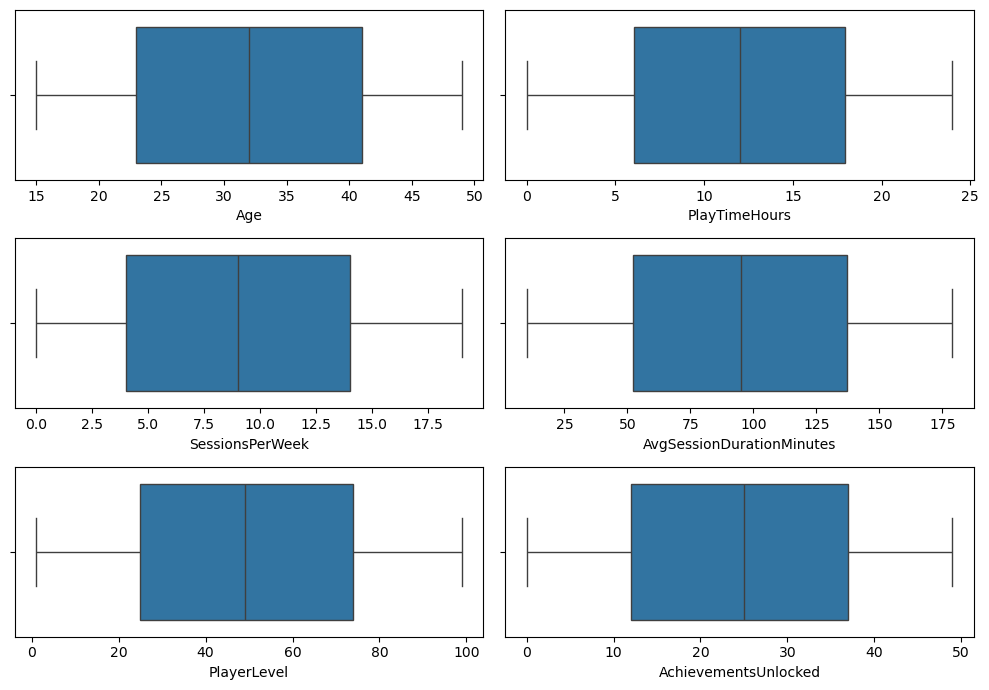

In [254]:
# Cheack the outliers
t=1
plt.figure(figsize=(10,7))
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data=data,x=i)
    t+=1
plt.tight_layout()
plt.show()

### Univariate Analysis

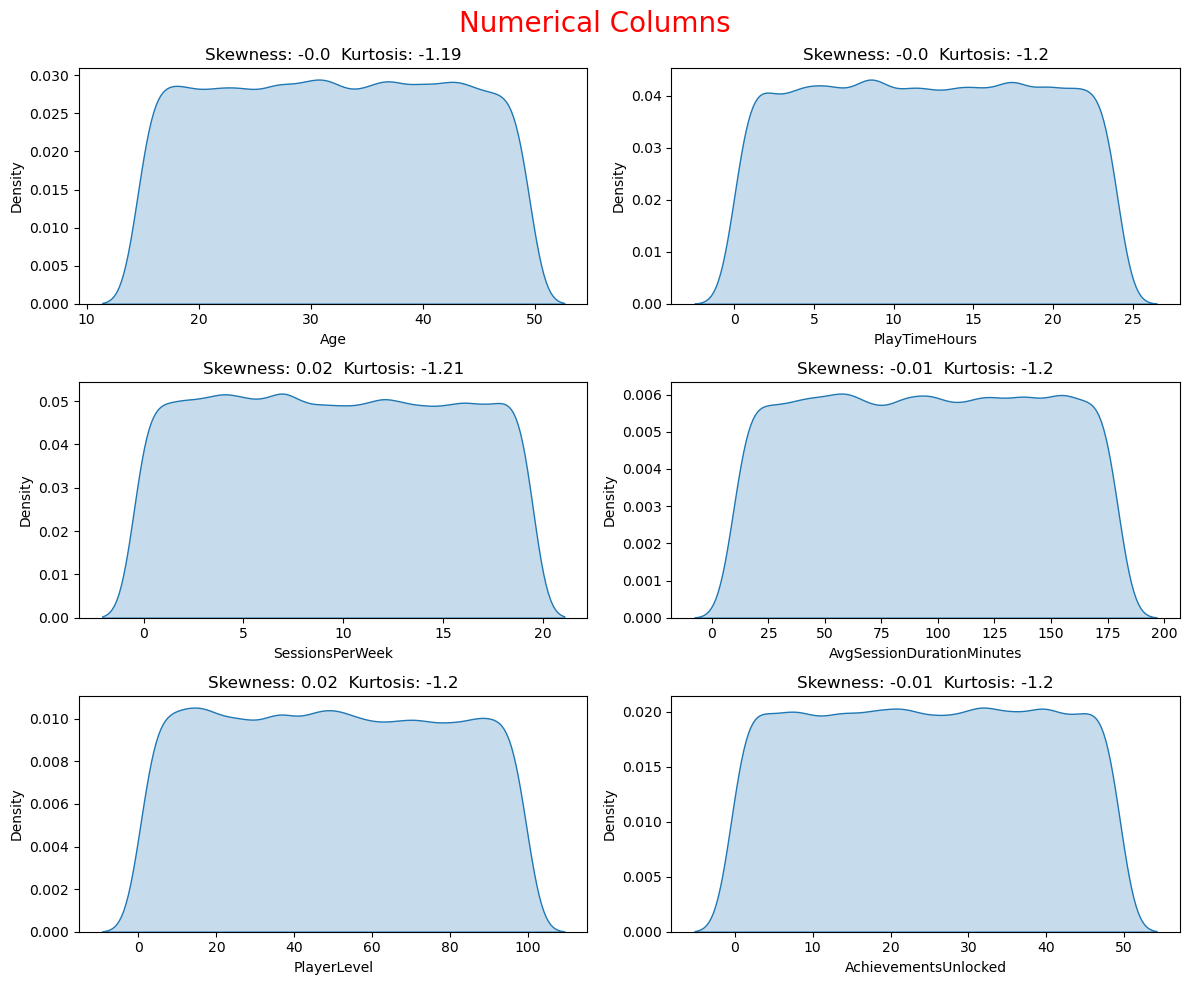

In [256]:
t=1
plt.figure(figsize=(12,10))
plt.suptitle('Numerical Columns',color='red',size=20)
for i in num_cols:
    s,k = data[i].skew(),data[i].kurt()
    plt.subplot(3,2,t)
    sns.kdeplot(data=data,x=i,fill=True)
    plt.title(f'Skewness: {round(s,2)}  Kurtosis: {round(k,2)}')
    t+=1
plt.tight_layout()
plt.show()

### Inferences:
1. **Age and PlayTimeHours:** The distribution is relatively normal, indicating a wide range of users spend a reasonable amount of time playing with a central tendency.
2. **SessionsPerWeek:** The distribution is normal. This means the users play a moderate number of sessions per week.
3. **AvgSessionDurationMinutes:** The distribution is also normal, suggesting that most sessions have a moderate duration.
4. **Player Level:** The distribution of the player levels appears to be normal, that is, most of the players are around a moderate level with fewer at higher levels.
5. **Achievements Unlocked:** The distribution is also normal, so most people have unlocked a moderate amount of achievements.on.

In [258]:
# Shapiro Test for Normality
# H0: Normal distribrution
#Ha: Not normal distribution
alpha=0.05
for i in num_cols:
    stat, p_value = shapiro(data[num_cols])
    print(f"For {i}:")
    if p_value > alpha:
        print("Data follows a normal distribution (fail to reject H0).\n")
    else:
        print("Data does not follow a normal distribution (reject H0).\n")

For Age:
Data does not follow a normal distribution (reject H0).

For PlayTimeHours:
Data does not follow a normal distribution (reject H0).

For SessionsPerWeek:
Data does not follow a normal distribution (reject H0).

For AvgSessionDurationMinutes:
Data does not follow a normal distribution (reject H0).

For PlayerLevel:
Data does not follow a normal distribution (reject H0).

For AchievementsUnlocked:
Data does not follow a normal distribution (reject H0).



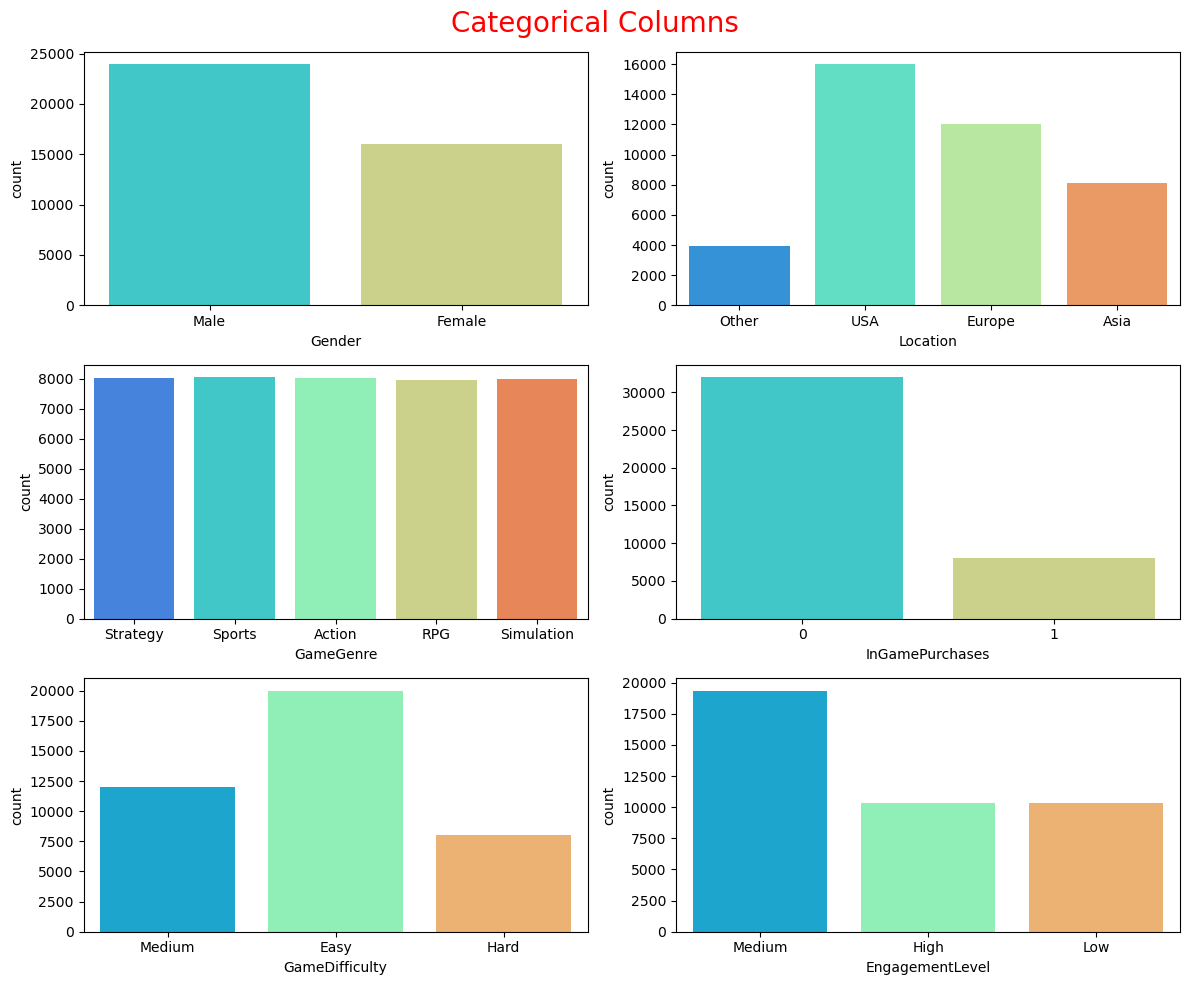

In [259]:
t=1
plt.figure(figsize=(12,10))
plt.suptitle('Categorical Columns',color='red',size=20)
for i in cat_cols:
    plt.subplot(3,2,t)
    sns.countplot(data=data,x=i,palette='rainbow')
    t+=1
plt.tight_layout()
plt.show()

### Inferences:
1. **Gender Balance:** Males are the most represented gender, with a significant difference compared to Females and Other genders.
2. **Dominant Region:** The USA has the most players, followed by Europe and Asia.
3. **Popular Game Genres:** Sports and Action games are the most popular among players.
4. **In-game Purchases:** Most players do not make in-game purchases, with a smaller proportion choosing to spend money on in-game items.
5. **Difficulty Game Preference:** A player prefers the game with an "Easy" difficulty setting and then "Medium" and lastly "Hard."
6. **Engagement Level Distribution:** The majority of the players have medium engagement levels while a smaller percent have high levels of engagement, and an even smaller percent are at low engagement levels.

## Bivariate Analysis

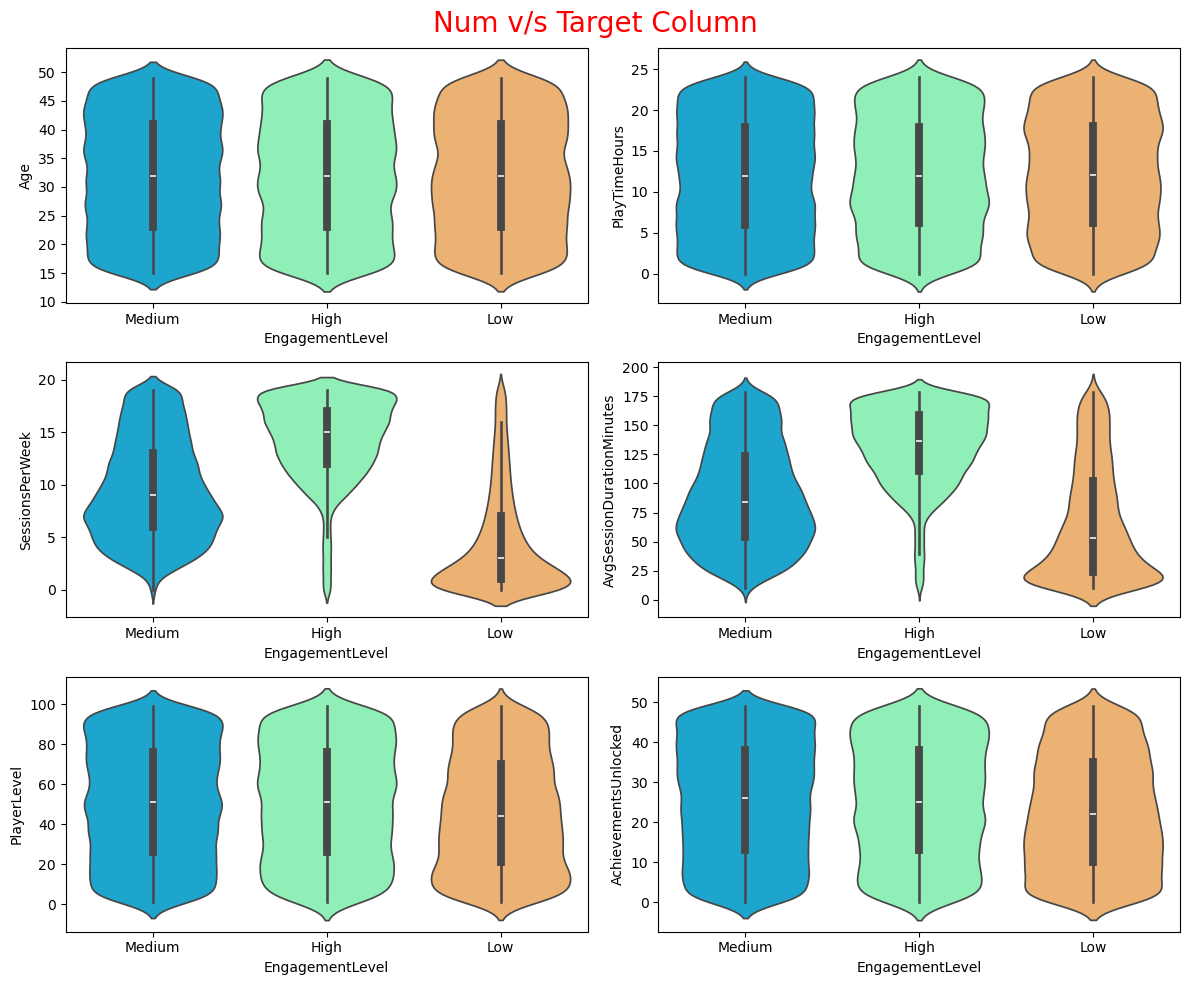

In [262]:
t=1
plt.figure(figsize=(12,10))
plt.suptitle('Num v/s Target Column',color='red',size=20)
for i in num_cols:
    plt.subplot(3,2,t)
    sns.violinplot(data=data,y=i,x=data['EngagementLevel'],palette='rainbow')
    t+=1
plt.tight_layout()
plt.show()

### Inferences:
1. **Age & Engagement:** Players with high engagement are a little older than those with medium or low engagement.
2. **Play Time & Engagement:** High engagement players have a much higher average play time compared to medium and low engagement players.
3. **Session Frequency & Engagement:** High engagement players have a higher average number of sessions per week compared to medium and low engagement players.
4. **Session Length & Engagement:** Players with high engagement have an average session length that is way higher than that of players with medium and low engagement.
5. **Player Level & Engagement:** Players who are highly engaged have a much higher player level compared to the ones with medium and low involvement.
6. **Achievements & Engagement:** High involvement players have unlocked many achievements as compared to those with medium and low involvement.


In [264]:
# peforming Kruskal-Wallis Test

for col in num_cols:
    h_stat, p_value = kruskal(i,data['EngagementLevel'])

    alpha = 0.05
    if p_value < alpha:
        print(f'For {col}\n we reject null hypothesis\n')
    else:
        print(f'For {col}\nwe fail to reject null\n')

For Age
we fail to reject null

For PlayTimeHours
we fail to reject null

For SessionsPerWeek
we fail to reject null

For AvgSessionDurationMinutes
we fail to reject null

For PlayerLevel
we fail to reject null

For AchievementsUnlocked
we fail to reject null



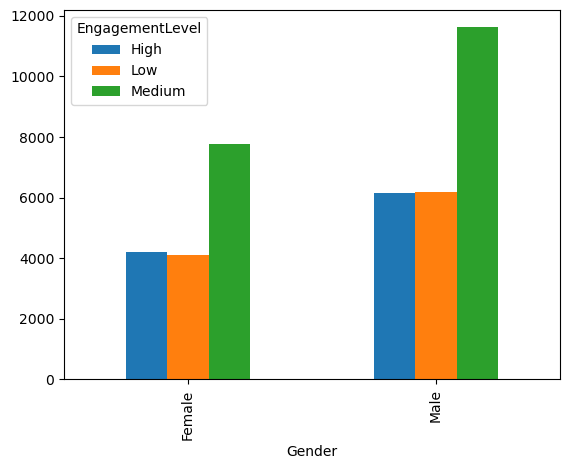

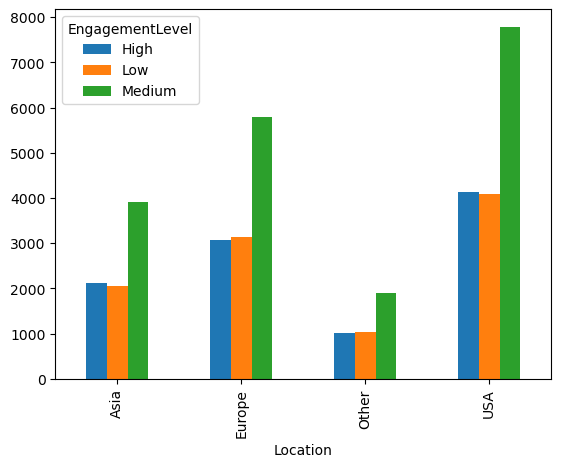

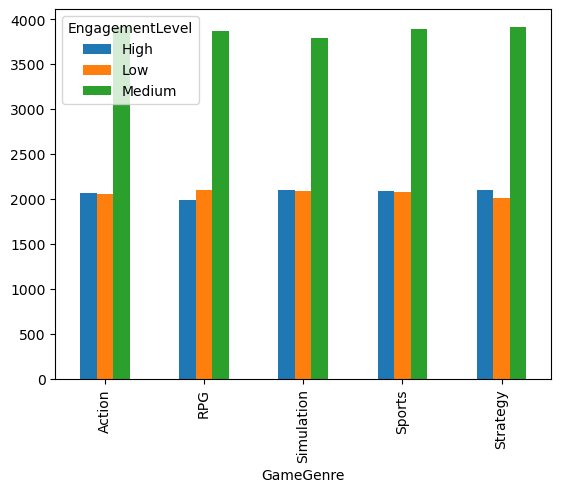

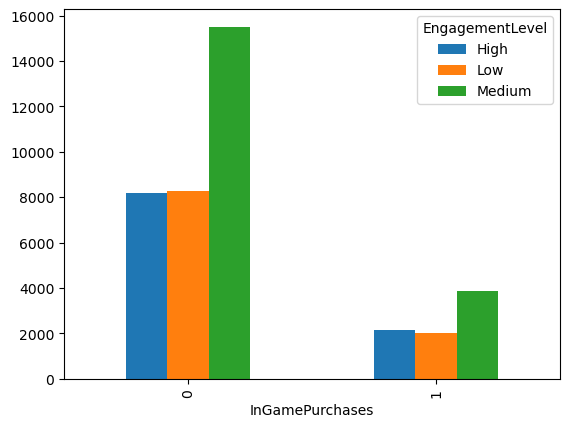

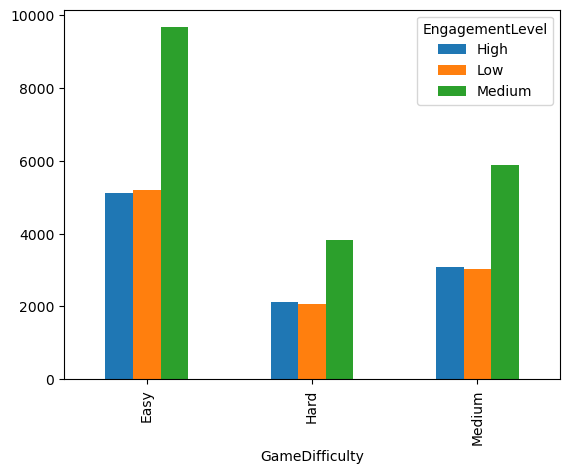

In [265]:
for i in cat_cols:
    if i!='EngagementLevel':
        pd.crosstab(data[i],data['EngagementLevel']).plot(kind='bar')
        plt.show()

### Inferences:
1. **Gender & Engagement:** In "Medium" engagement level, the count is highly significant in males than females; however, for "High" and "Low" categories, both genders exhibit almost equal counts.
2. **Location & Engagement:** The "Medium" level is dominating all places, and USA has the highest count, whereas "High" and "Low" levels are relatively consistent and lower across regions.
3. **Game Genre & Engagement:** Across different game genres, Medium engagement levels are consistently the highest, followed by High engagement, and then Low engagement.
4. **In Game Purchases & Engagement:** Players who make In-Game Purchases tend to have higher engagement levels, with Medium engagement being the most prevalent across both groups, followed by High and then Low engagement.
5. **Game Difficulty & Engagement:** Across all difficulty levels, Medium engagement is consistently higher than High and Low engagement, suggesting that games with moderate difficulty levels tend to attract and retain players the most.

In [267]:
# lets do chi-square contingency test to make final conclusions
# Ho: The columns are independent
# Ha: Columns are dependent

for i in cat_cols:
    if i != 'EngagementLevel':
        contingency_table = pd.crosstab(data[i],data['EngagementLevel'])
        chi = chi2_contingency(contingency_table)[1]
        if chi  > 0.05:
            print(f'For {i}:\nThe columns are independent (Fail to reject Ho) \n')
        else:
            print(f'For {i}:\nThe columns are dependent (Reject Ho) \n')

For Gender:
The columns are independent (Fail to reject Ho) 

For Location:
The columns are independent (Fail to reject Ho) 

For GameGenre:
The columns are independent (Fail to reject Ho) 

For InGamePurchases:
The columns are independent (Fail to reject Ho) 

For GameDifficulty:
The columns are independent (Fail to reject Ho) 



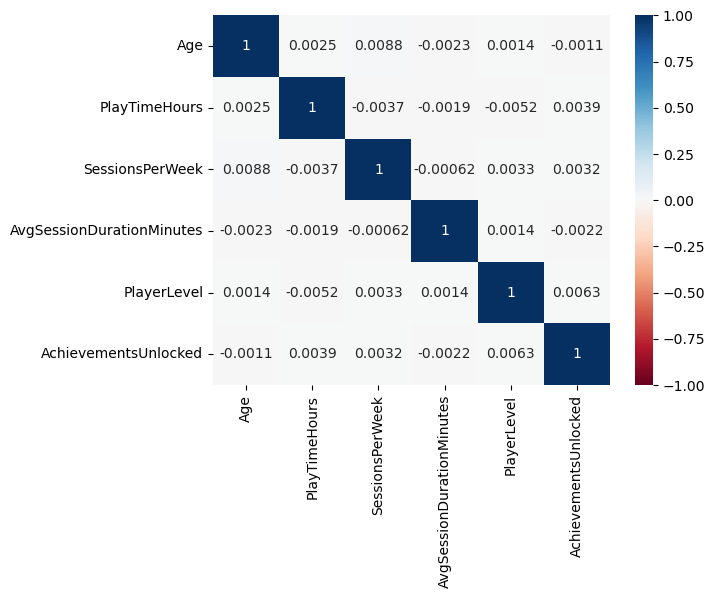

In [268]:
# Lets check the correlation between the columns
sns.heatmap(data=data[num_cols].corr(),vmin=-1,vmax=1,annot=True,cmap='RdBu')
plt.show()


### Inferences:
1. **Positive Correlation:** PlayTimeHours and SessionsPerWeek are positively correlated, indicating players who play longer also have more gaming sessions.
2. **Moderate Correlation:** SessionsPerWeek shows a moderate positive correlation with PlayerLevel, suggesting more sessions lead to higher levels.
3. **Weak or No Correlation:** Age has minimal correlation with most other variables.
4. **Mixed Correlations for Achievements:** AchievementsUnlocked has weak positive correlations with SessionsPerWeek and PlayerLevel but weak negative correlations with PlayTimeHours and AvgSessionDurationMinutes.
5. **Overall:** SessionsPerWeek and PlayTimeHours show stronger correlations with each other and PlayerLevel than with other factors like Age and AvgSessionDurationMinutes.

## Encoding

In [271]:
cat_cols

['Gender',
 'Location',
 'GameGenre',
 'InGamePurchases',
 'GameDifficulty',
 'EngagementLevel']

In [272]:
loc={'Asia':0,'Europe':1,'Other':2,'USA':3}
gen={'Sports':0,'Action':1,'Strategy':2,'Simulation':3,'RPG':4}
diff={'Easy':0,'Medium':1,'Hard':2}
eng={'Low':0,'Medium':1,'High':2}

In [273]:
data['Location']=data['Location'].map(loc)
data['GameGenre']=data['GameGenre'].map(gen)
data['GameDifficulty']= data['GameDifficulty'].map(diff)
data['EngagementLevel']= data['EngagementLevel'].map(eng)

In [274]:
data=pd.get_dummies(data,columns=['Gender'],drop_first=True,dtype='int')

In [275]:
data.head()

,Age,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_Male
PlayerID,,,,,,,,,,,,
9000,43,2,2,16.271119,0,1,6,108,79,25,1,1
9001,29,3,2,5.525961,0,1,5,144,11,10,1,0
9002,22,3,0,8.223755,0,0,16,142,35,41,2,0
9003,35,3,1,5.265351,1,0,9,85,57,47,1,1
9004,33,1,1,15.531945,0,1,2,131,95,37,1,1


# Model Fitting

In [277]:
# importing all the needed libraries

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier,StackingClassifier)
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,confusion_matrix,
                            classification_report,roc_auc_score,roc_curve)

## Train Test Split

In [279]:
y = data['EngagementLevel']
x = data.drop(columns='EngagementLevel')

In [280]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [281]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32027, 11)
(32027,)
(8007, 11)
(8007,)


In [282]:
m = []
acu = []
rec = []
pre = []
f1 = []
kap = []

def model_validation(model,trainx,trainy,testx,testy):
    mod = model
    mod.fit(trainx,trainy)
    pred_s = mod.predict_proba(testx)
    pred_h = mod.predict(testx)
    
    print(confusion_matrix(testy,pred_h))
    print(classification_report(testy,pred_h))
    y_test_bin = label_binarize(testy, classes=[0, 1, 2])
# Plot ROC curves for each class
    plt.figure(figsize=(8, 6))
    for i in range(y_test_bin.shape[1]):  # Loop through each class
        fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], pred_s[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')
    
    # Plot the random classifier (diagonal line)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    
    # Title and labels for the plot
    plt.title(f'ROC AUC for Each Class')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()
        
      
    response = input('Do you want to save this model? Y/N')
    
    if response.lower() == 'y':
        global scorecard
        m.append(str(model))
        acu.append(accuracy_score(testy,pred_h))
        rec.append(recall_score(testy,pred_h, average='macro'))
        pre.append(precision_score(testy,pred_h, average='macro'))
        f1.append(f1_score(testy,pred_h, average='macro'))
        kap.append(cohen_kappa_score(testy,pred_h))
        
        scorecard = pd.DataFrame({'Model':m,'Accuracy':acu,'Recall':rec,
                                 'Precison':pre,'F1 Score':f1,'Cohen-Kappa':kap})
    else:
        return


# Logistic Regression (Base Model)

[[1681  359  148]
 [ 797 1976 1022]
 [  72  276 1676]]
              precision    recall  f1-score   support

           0       0.66      0.77      0.71      2188
           1       0.76      0.52      0.62      3795
           2       0.59      0.83      0.69      2024

    accuracy                           0.67      8007
   macro avg       0.67      0.71      0.67      8007
weighted avg       0.69      0.67      0.66      8007



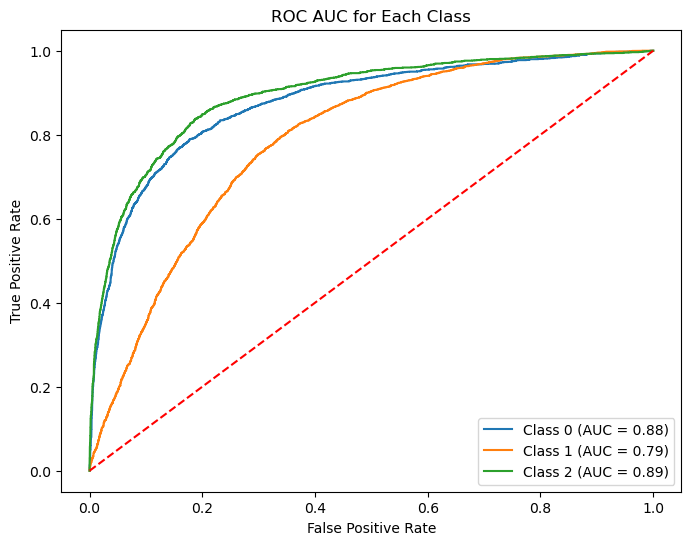

Do you want to save this model? Y/N y


In [284]:
model_validation(LogisticRegression(class_weight='balanced'),x_train,y_train,x_test,y_test)

In [285]:
scorecard

,Model,Accuracy,Recall,Precison,F1 Score,Cohen-Kappa
0,LogisticRegression(class_weight='balanced'),0.666042,0.705677,0.668304,0.6716,0.500492


In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,AdaBoostClassifier,
                             GradientBoostingClassifier,VotingClassifier,
                             StackingClassifier)
from xgboost import XGBClassifier

from sklearn.metrics import (accuracy_score,precision_score,recall_score,
                            f1_score,cohen_kappa_score,confusion_matrix,
                            classification_report,roc_auc_score,roc_curve)
from sklearn.model_selection import GridSearchCV

# Decision Tree

[[1704  432   52]
 [ 199 3479  117]
 [  54  337 1633]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      2188
           1       0.82      0.92      0.87      3795
           2       0.91      0.81      0.85      2024

    accuracy                           0.85      8007
   macro avg       0.87      0.83      0.85      8007
weighted avg       0.86      0.85      0.85      8007



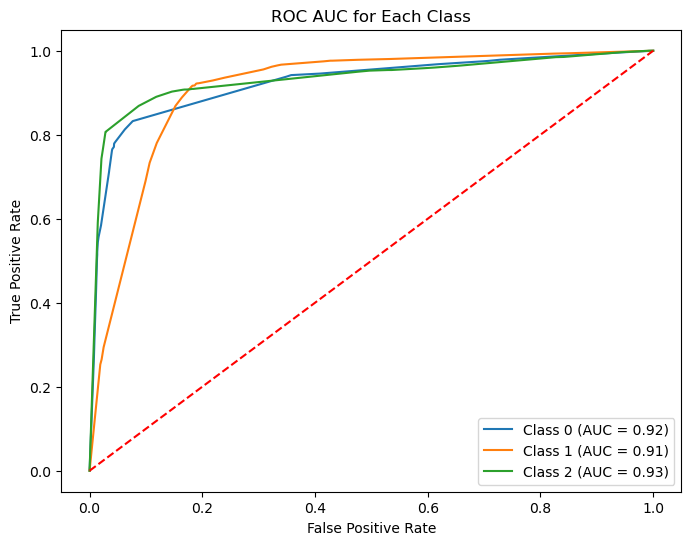

Do you want to save this model? Y/N y


In [288]:
model_validation(DecisionTreeClassifier(max_depth=5),x_train,y_train,x_test,y_test)

In [289]:
scorecard

,Model,Accuracy,Recall,Precison,F1 Score,Cohen-Kappa
0,LogisticRegression(class_weight='balanced'),0.666042,0.705677,0.668304,0.671600,0.500492
1,DecisionTreeClassifier(max_depth=5),0.851255,0.834115,0.865303,0.846976,0.761959


In [290]:
# Fine tune DT

grid = {'max_depth':[4,5,6,7,8,9,10],
        'min_samples_split':[2,3,4]}

gscv = GridSearchCV(estimator=DecisionTreeClassifier(),cv=5,scoring='accuracy',
                   verbose=1,param_grid=grid)

In [291]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy', verbose=1)

In [292]:
gscv.best_params_

{'max_depth': 9, 'min_samples_split': 2}

[[1855  272   61]
 [ 135 3556  104]
 [  62  182 1780]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      2188
           1       0.89      0.94      0.91      3795
           2       0.92      0.88      0.90      2024

    accuracy                           0.90      8007
   macro avg       0.90      0.89      0.89      8007
weighted avg       0.90      0.90      0.90      8007



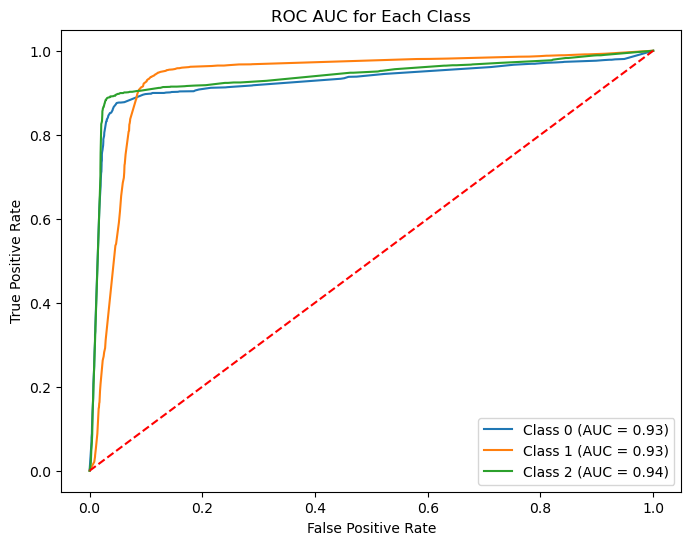

Do you want to save this model? Y/N y


In [293]:
model_validation(DecisionTreeClassifier(**gscv.best_params_),x_train,y_train,x_test,y_test)

In [294]:
scorecard

,Model,Accuracy,Recall,Precison,F1 Score,Cohen-Kappa
0,LogisticRegression(class_weight='balanced'),0.666042,0.705677,0.668304,0.671600,0.500492
1,DecisionTreeClassifier(max_depth=5),0.851255,0.834115,0.865303,0.846976,0.761959
2,DecisionTreeClassifier(max_depth=9),0.898089,0.888092,0.901982,0.894387,0.838545


# Random Forest

In [296]:
grid = {'n_estimators':[110,120,130],
       'max_depth':[4,5,6]}

gscv = GridSearchCV(estimator=RandomForestClassifier(),cv=5,scoring='accuracy',
                   verbose=1,param_grid=grid)

In [297]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6],
                         'n_estimators': [110, 120, 130]},
             scoring='accuracy', verbose=1)

In [298]:
gscv.best_params_

{'max_depth': 6, 'n_estimators': 130}

[[1580  556   52]
 [  82 3559  154]
 [  49  340 1635]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      2188
           1       0.80      0.94      0.86      3795
           2       0.89      0.81      0.85      2024

    accuracy                           0.85      8007
   macro avg       0.87      0.82      0.84      8007
weighted avg       0.86      0.85      0.84      8007



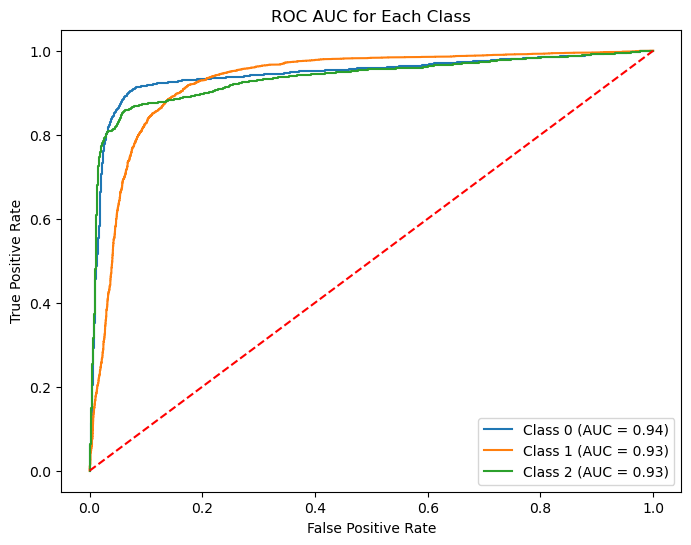

Do you want to save this model? Y/N y


In [299]:
model_validation(RandomForestClassifier(**gscv.best_params_),
                 x_train,y_train,x_test,y_test)

In [300]:
scorecard

,Model,Accuracy,Recall,Precison,F1 Score,Cohen-Kappa
0,LogisticRegression(class_weight='balanced'),0.666042,0.705677,0.668304,0.671600,0.500492
1,DecisionTreeClassifier(max_depth=5),0.851255,0.834115,0.865303,0.846976,0.761959
2,DecisionTreeClassifier(max_depth=9),0.898089,0.888092,0.901982,0.894387,0.838545
3,"RandomForestClassifier(max_depth=6, n_estimato...",0.846010,0.822580,0.870140,0.839769,0.751541


# AdaBoost

[[1425  718   45]
 [ 179 3571   45]
 [  51  541 1432]]
              precision    recall  f1-score   support

           0       0.86      0.65      0.74      2188
           1       0.74      0.94      0.83      3795
           2       0.94      0.71      0.81      2024

    accuracy                           0.80      8007
   macro avg       0.85      0.77      0.79      8007
weighted avg       0.82      0.80      0.80      8007



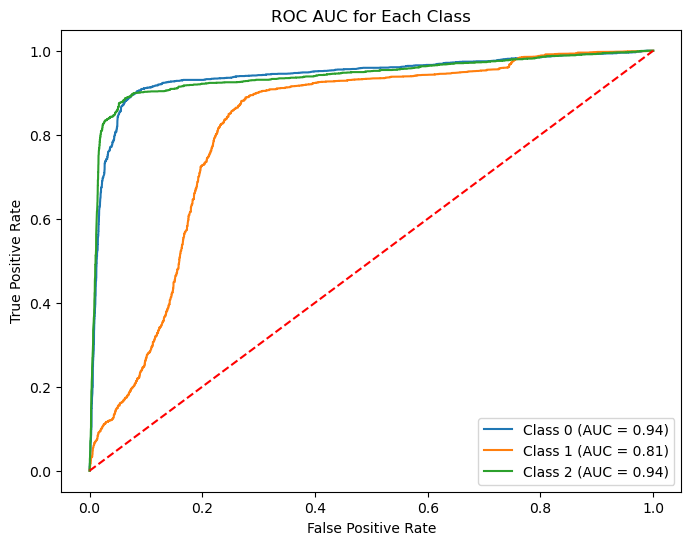

Do you want to save this model? Y/N y


In [302]:
model_validation(AdaBoostClassifier(n_estimators=150,learning_rate=0.1),
                x_train,y_train,x_test,y_test)

In [303]:
scorecard

,Model,Accuracy,Recall,Precison,F1 Score,Cohen-Kappa
0,LogisticRegression(class_weight='balanced'),0.666042,0.705677,0.668304,0.671600,0.500492
1,DecisionTreeClassifier(max_depth=5),0.851255,0.834115,0.865303,0.846976,0.761959
2,DecisionTreeClassifier(max_depth=9),0.898089,0.888092,0.901982,0.894387,0.838545
3,"RandomForestClassifier(max_depth=6, n_estimato...",0.846010,0.822580,0.870140,0.839769,0.751541
4,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.802798,0.766588,0.847077,0.792446,0.676487


# XGBoost

In [305]:
grid={'n_estimators':[70,100,120],
     'max_depth':[5,7,9,11]}

In [306]:
gscv= GridSearchCV(estimator=XGBClassifier(learning_rate=1),param_grid=grid,cv=5,scoring='accuracy',verbose=1)

In [307]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=1, max...one,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [5, 7, 9, 11],
                         'n_estimators': [70, 100, 120]},
             scoring='accuracy', verbose=1)

In [308]:
gscv.best_params_

{'max_depth': 11, 'n_estimators': 100}

In [309]:
gscv.best_score_

0.9126987799055482

[[1948  183   57]
 [ 100 3608   87]
 [  58  154 1812]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      2188
           1       0.91      0.95      0.93      3795
           2       0.93      0.90      0.91      2024

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.92      8007
weighted avg       0.92      0.92      0.92      8007



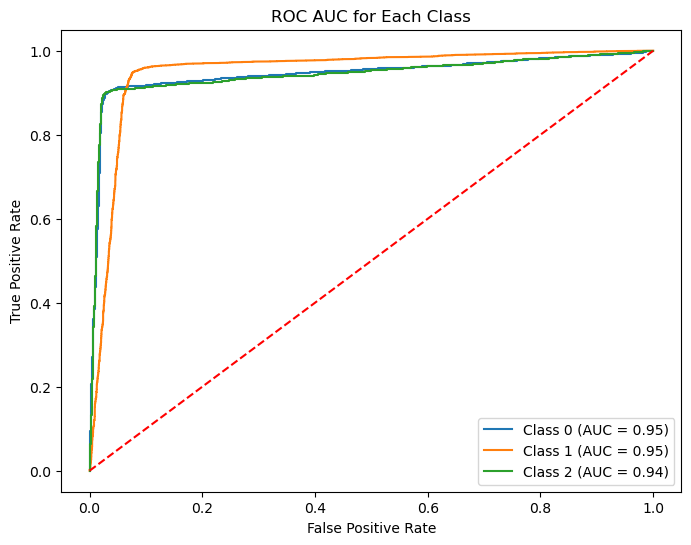

Do you want to save this model? Y/N y


In [310]:
model_validation(XGBClassifier(**gscv.best_params_),
                x_train,y_train,x_test,y_test)

[[1916  217   55]
 [ 120 3582   93]
 [  57  198 1769]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      2188
           1       0.90      0.94      0.92      3795
           2       0.92      0.87      0.90      2024

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007



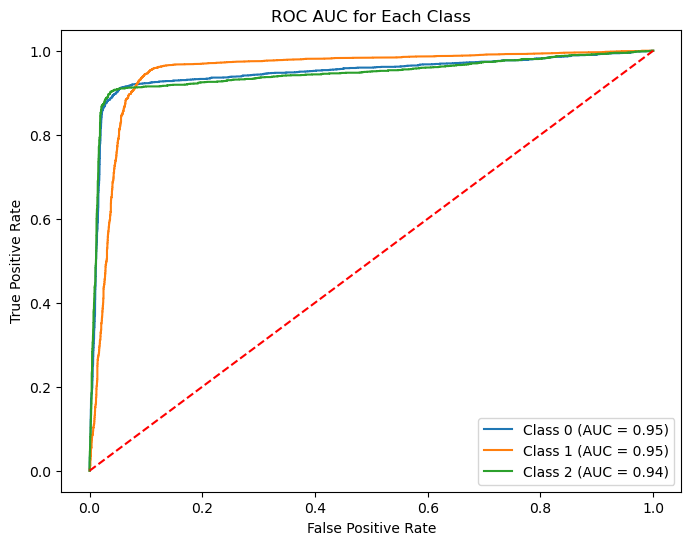

Do you want to save this model? Y/N y


In [311]:
model_validation(XGBClassifier(n_estimators=70, learning_rate=0.05,max_depth=5),
                x_train,y_train,x_test,y_test)

In [312]:
scorecard

,Model,Accuracy,Recall,Precison,F1 Score,Cohen-Kappa
0,LogisticRegression(class_weight='balanced'),0.666042,0.705677,0.668304,0.671600,0.500492
1,DecisionTreeClassifier(max_depth=5),0.851255,0.834115,0.865303,0.846976,0.761959
2,DecisionTreeClassifier(max_depth=9),0.898089,0.888092,0.901982,0.894387,0.838545
3,"RandomForestClassifier(max_depth=6, n_estimato...",0.846010,0.822580,0.870140,0.839769,0.751541
4,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.802798,0.766588,0.847077,0.792446,0.676487
5,"XGBClassifier(base_score=None, booster=None, c...",0.920195,0.912097,0.921977,0.916722,0.873897
6,"XGBClassifier(base_score=None, booster=None, c...",0.907581,0.897857,0.911467,0.904088,0.853641


In [313]:
# Lets check for the variance in DT and XGBoost

In [314]:
from sklearn.model_selection import cross_val_score, KFold

In [391]:
cross_validation_scores=cross_val_score(estimator=DecisionTreeClassifier(max_depth=9,min_samples_split=4),X=x_train,y=y_train,
                scoring='accuracy',cv=KFold(n_splits=7,shuffle=True,random_state=2))

In [393]:
cross_validation_scores

array([0.89576049, 0.90013112, 0.89027322, 0.89595628, 0.90010929,
       0.89551913, 0.89551913])

## Final Model

In [379]:
final_model=DecisionTreeClassifier(max_depth=9,min_samples_split=4)

In [381]:
final_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_split=4)

## Business Interpretation

In [383]:
f1_data=pd.DataFrame(final_model.feature_importances_,index=x_train.columns).sort_values(by=0,ascending=False)
f1_data

,0
SessionsPerWeek,0.589237
AvgSessionDurationMinutes,0.335976
PlayerLevel,0.032957
AchievementsUnlocked,0.032863
PlayTimeHours,0.004074
Age,0.001963
GameDifficulty,0.001169
GameGenre,0.000706
Location,0.000488
Gender_Male,0.000464


<Axes: >

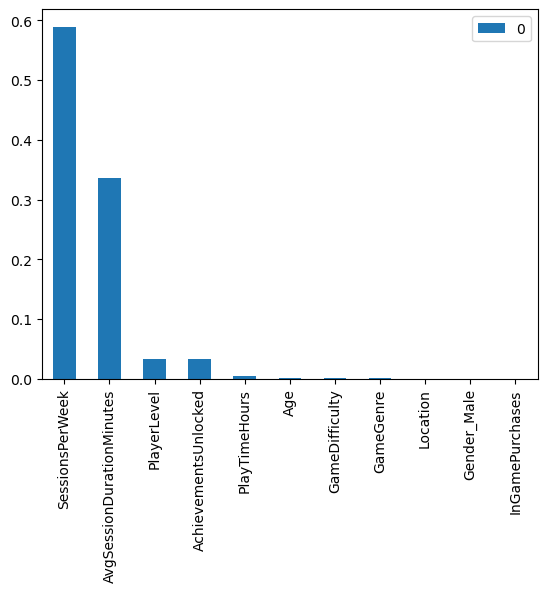

In [389]:
f1_data.plot(kind='bar')